In [1]:
import pandas as pd 

df = pd.read_csv('/home/ubuntu/repo_battleship/battleship/notebooks/benchmark_results/05-07-full-results.csv')
df_gold = pd.read_csv("/home/ubuntu/repo_battleship/gold-v2.csv")

In [2]:
#d = df_gold[(df_gold["gold_ambiguous"] == False) & (df_gold["gold_stateful"] == False) & (df_gold["gold_vague"] == False) & (df_gold["gold_discourse"] == False)]
#d = df_gold[(df_gold["gold_discourse"] == True) & (df_gold["gold_stateful"] == True)]
d = df_gold[df_gold["gold_stateful"] == True]
d = d[(d["gold_answer"].notna())]
d_human, d_gold = d["messageText"].tolist(), d["gold_answer"].tolist()
human_performance = sum([d_human[i] == d_gold[i] for i in range(len(d_human))])/len(d_human)
human_performance

0.9414634146341463

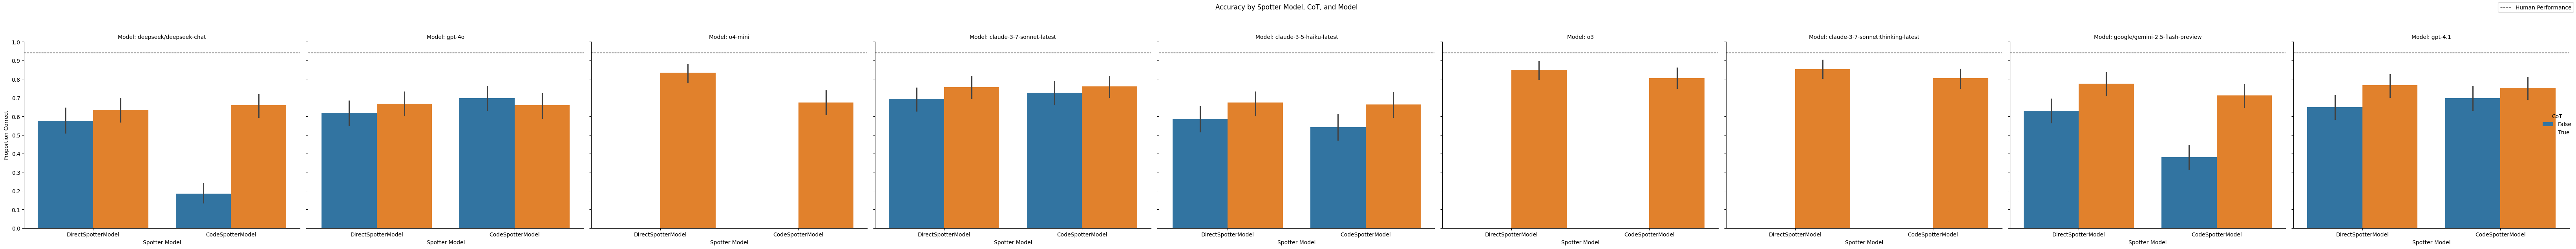

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_filtered = df[(df["gold_ambiguous"] == False) & (df["gold_stateful"] == False) & (df["gold_vague"] == False) & (df["gold_discourse"] == False)]
#df_filtered = df[(df["gold_discourse"] == True) & (df["gold_stateful"] == True)]
df_filtered = df[df["gold_stateful"] == True]

g = sns.catplot(
    data=df_filtered,
    x='spotterModel',
    y='is_correct',
    hue='CoT',
    col='model',
    kind='bar',
    errorbar=('ci', 95),
    height=6,
    aspect=1.2
)
g.set_axis_labels('Spotter Model', 'Proportion Correct')
g.set_titles('Model: {col_name}')
g.fig.suptitle('Accuracy by Spotter Model, CoT, and Model', y=1.05)

# Add the horizontal line to all axes
for ax in g.axes.flat:
    ax.set_yticks([x/10 for x in range(0,11,1)])
    ax.axhline(human_performance, color='black', linestyle='--', linewidth=1, label='Human Performance')

# Add a legend for the human performance line if needed
# Get the first subplot's lines
lines = g.axes[0, 0].get_lines()
# Add a label to the legend for the human performance line
g.fig.legend(lines[-1:], ['Human Performance'], loc='upper right')

plt.tight_layout()
plt.show()